# Aastad ja kuritöö kategooriad

In [2]:
import pandas as pd
#offences by category 2008 - 2023
df = pd.read_csv("../data/cleanedDatasets/nan_rows/country_names_changed/police_recorded_offences_by_offence_category_new.tsv", sep="\t")
df.columns = df.columns.str.strip()
print(df.head())
print(df.unit.value_counts())

  freq      iccs unit                     geo   2008   2009   2010   2011  \
0    A  ICCS0101   NR                 Albania   88.0   82.0  118.0  124.0   
1    A  ICCS0101   NR                 Austria   58.0   51.0   61.0   80.0   
2    A  ICCS0101   NR  Bosnia and Herzegovina   66.0   67.0   54.0   49.0   
3    A  ICCS0101   NR                 Belgium  204.0  189.0  189.0  214.0   
4    A  ICCS0101   NR                Bulgaria  172.0  150.0  148.0  128.0   

    2012   2013   2014   2015   2016   2017   2018   2019   2020   2021  \
0  125.0  107.0   98.0   54.0   71.0   52.0   51.0   58.0   52.0   61.0   
1   88.0   63.0   43.0   42.0   49.0   61.0   73.0   74.0   54.0   59.0   
2   60.0   46.0   49.0   56.0   42.0   34.0   36.0   37.0   42.0   31.0   
3  206.0  204.0  210.0  231.0  175.0  198.0  192.0  147.0  149.0  157.0   
4  141.0  109.0  112.0  126.0   79.0   95.0   92.0   81.0   67.0   89.0   

    2022   2023  
0   42.0   34.0  
1   65.0   75.0  
2   34.0   35.0  
3  185.0  162.

In [3]:
iccs_mapping = {
    "ICCS0101": "Intentional homicide",
    "ICCS0102": "Attempted intentional homicide",
    "ICCS020111": "Serious assault",
    "ICCS020221": "Kidnapping",
    "ICCS0301" : "Sexual violence",
    "ICCS03011" : "Rape",
    "ICCS03012" : "Sexual Assault",
    "ICCS030221" : "Child pornography",
    "ICCS0302" : "Sexual exploitation",
    "ICCS0401": "Robbery",
    "ICCS0501": "Burglary",
    "ICCS05012": "Burglary of private residential premises",
    "ICCS0502": "Theft",
    "ICCS05021": "Theft of a motorized vehicle or parts thereof",
    "ICCS0601" : "Unlawful acts involving controlled drugs",
    "ICCS0701" : "Fraud",
    "ICCS0703" : "Corruption",
    "ICCS07031" : "Bribery",
    "ICCS07041" : "Money laundering",
    "ICCS0903" : "Acts against computer systems",
    "ICCS09051" : "Participation in an organized criminal group",
    "ICCS1001" : "Acts that cause environmental pollution or degradation",
    "ICCS1004" : "Acts that result in the depletion or degradation of natural resources",
    "ICCS1002" : "Acts involving the movement or dumping of waste",
    "ICCS1003" : "Trade or possession of protected or prohibited species of fauna and flora",
}

Mida plaanis leida/uurida/visualiseerida?

Kuritegude arv:
- Kogu kuritegevus kogu Euroopas aastate lõikes? (Total on ainult ajaloolistel andmetel, kokku liitmine ei aita, kuna pole esindatud kõik võimalikud kuritöö liigid)
- Iga kuritöö liik kogu Euroopas aastate lõikes
    - iga kuritöö liik riikide kaupa aastate lõikes. Drastilisi muutusi?


Kuritegude proportsionaalne arv rahvaga:
- Kogu kuritegevus kogu Euroopas aastate lõikes
- Iga kuritöö liik kogu Euroopas aastate lõikes
    - iga kuritöö liik riikide kaupa aastate lõikes. Drastilisi muutusi?

## Kuritegevus liigi kaupa kogu Euroopas aastate lõikes

Erinevat liiki kuritegevust on selles andmestikus stabiilselt salvestama hakatud erinevatel aegadel.<br>
Alates 2020: ICCS10<br>
Alates 2016: ICCS0302, ICCS07, ICCS09<br>
Alates 2008: ülejäänud andmestikus sisalduvad<br>

In [4]:
unique_iccs = df.iccs.unique()
print(unique_iccs)

['ICCS0101' 'ICCS0102' 'ICCS020111' 'ICCS020221' 'ICCS0301' 'ICCS03011'
 'ICCS03012' 'ICCS0302' 'ICCS030221' 'ICCS0401' 'ICCS0501' 'ICCS05012'
 'ICCS0502' 'ICCS05021' 'ICCS0601' 'ICCS0701' 'ICCS0703' 'ICCS07031'
 'ICCS07041' 'ICCS0903' 'ICCS09051' 'ICCS1001' 'ICCS1002' 'ICCS1003'
 'ICCS1004']


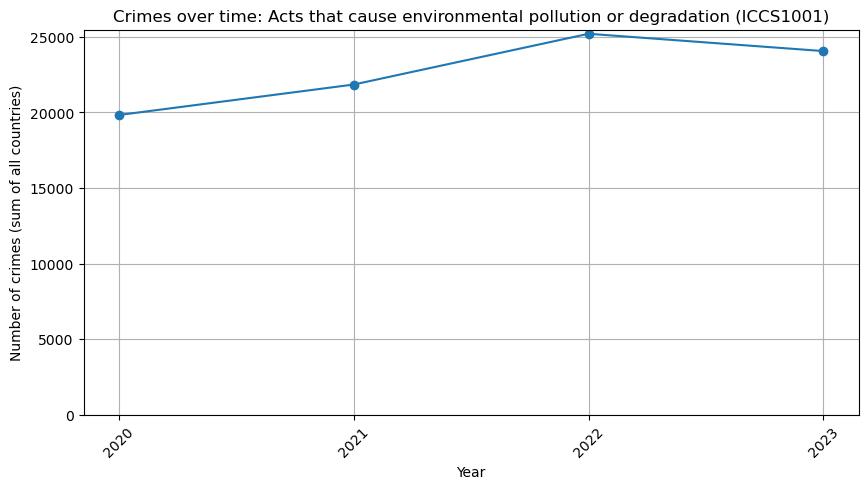

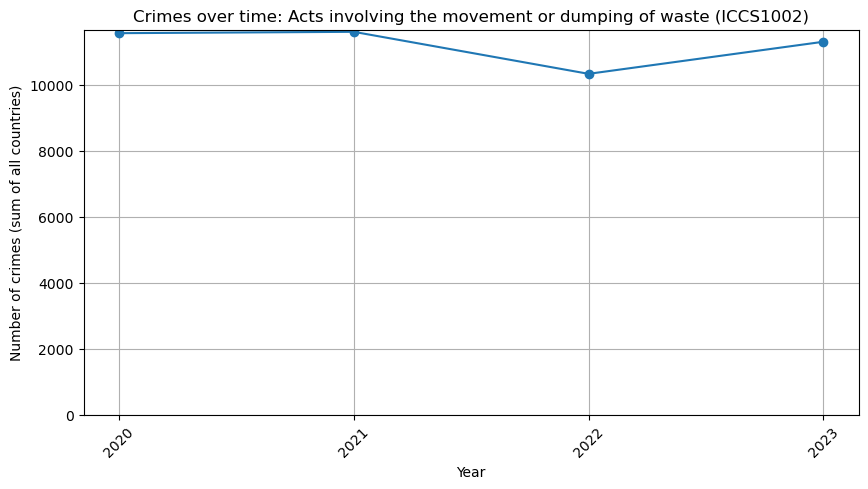

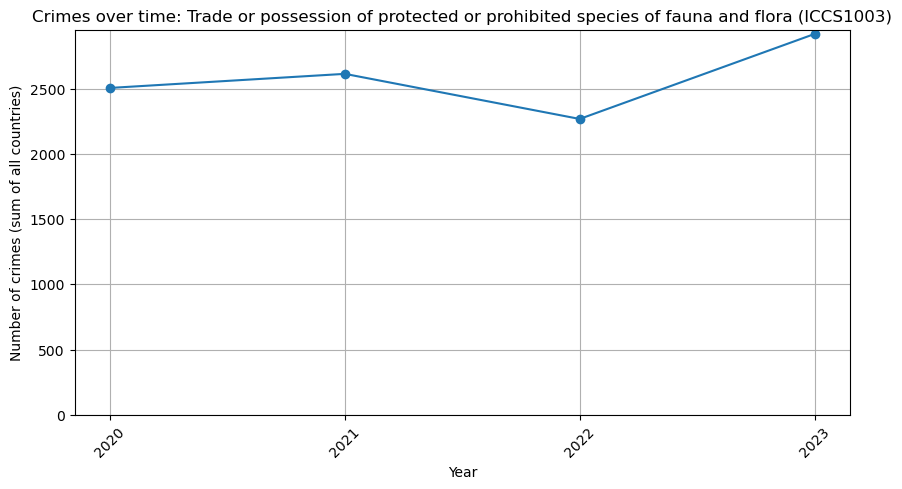

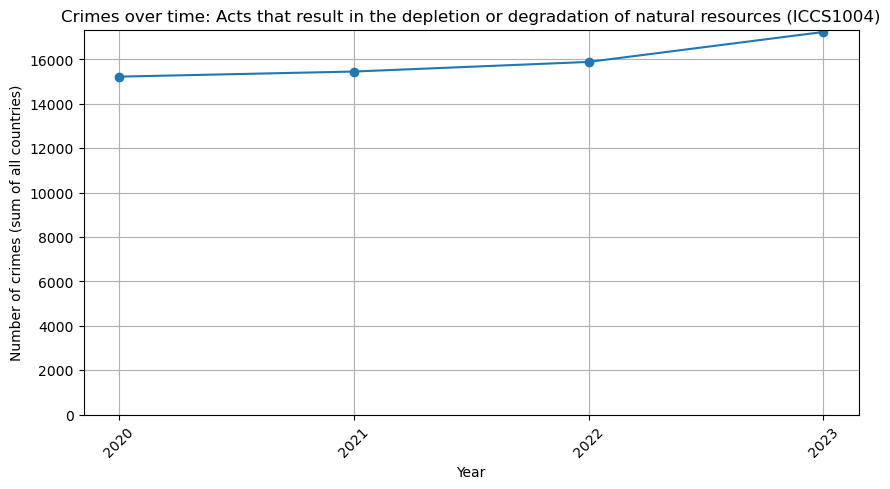

In [5]:
# vaatleme ICCS10 kuritegusid alates 2020 aastast
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

year_cols = ['2020', '2021', '2022', '2023']
codes = ['ICCS1001', 'ICCS1002', 'ICCS1003','ICCS1004']

for code in codes:
    dfcode = df[(df.iccs == code) & (df.unit == 'NR')]
    yearsum = dfcode[year_cols].sum()

    # get crime name from mapping, fallback to code if not found
    crime_name = iccs_mapping.get(code, code)

    plt.figure(figsize=(10,5))
    plt.plot(year_cols, yearsum, marker="o")
    plt.title(f"Crimes over time: {crime_name} ({code})")
    plt.xlabel("Year")
    plt.ylabel("Number of crimes (sum of all countries)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.ylim(bottom=0)

    # Force plain numbers
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # disable offset
    ax.ticklabel_format(style='plain', axis='y')
    plt.show()

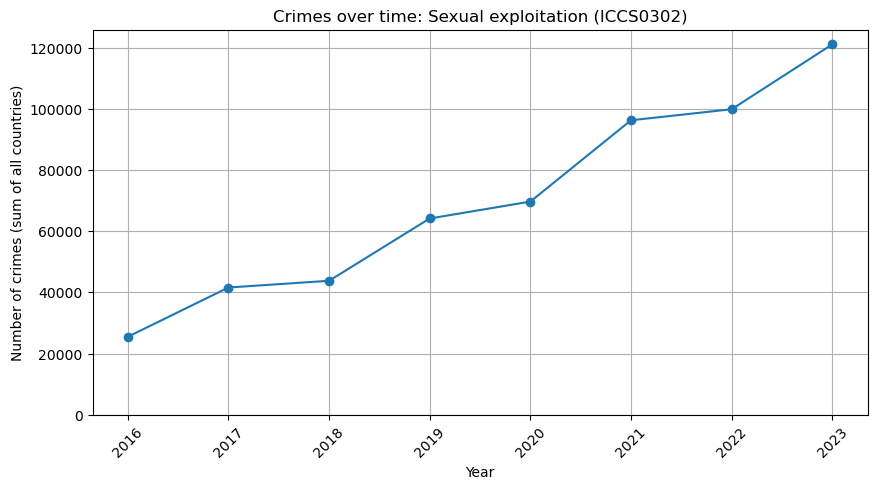

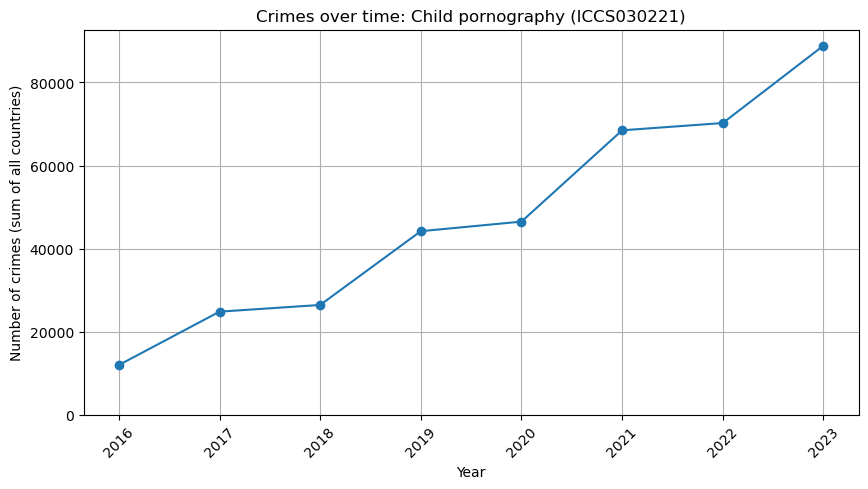

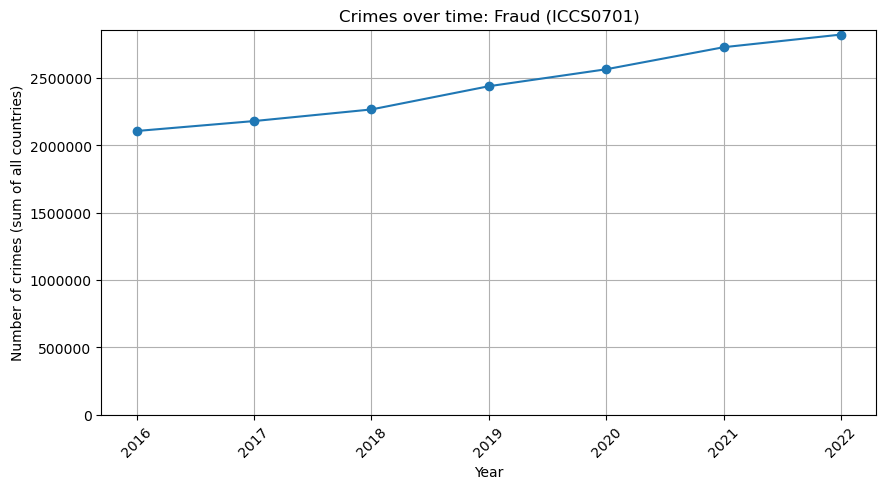

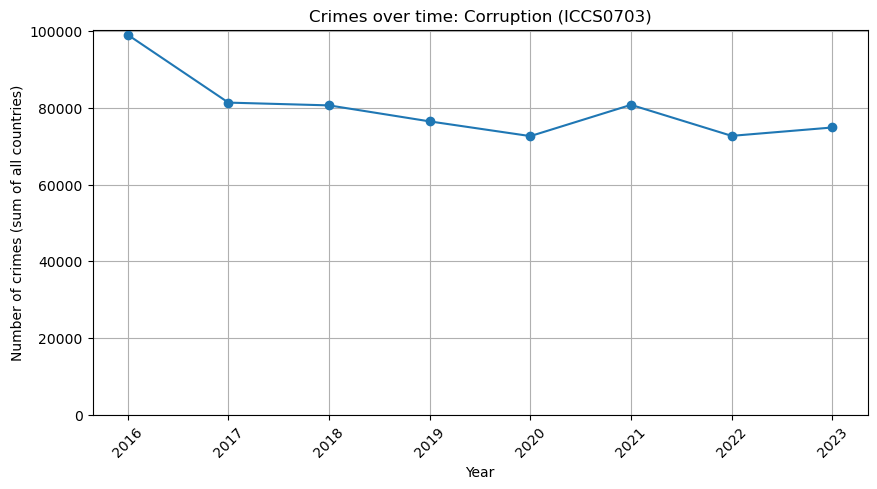

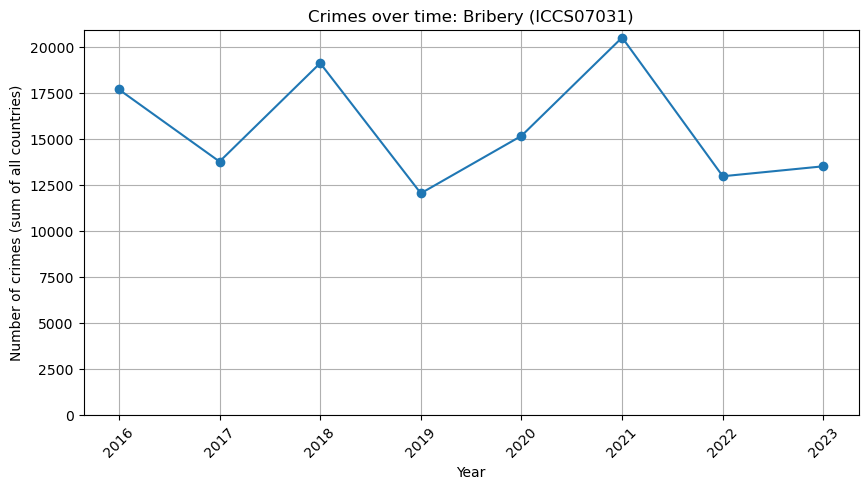

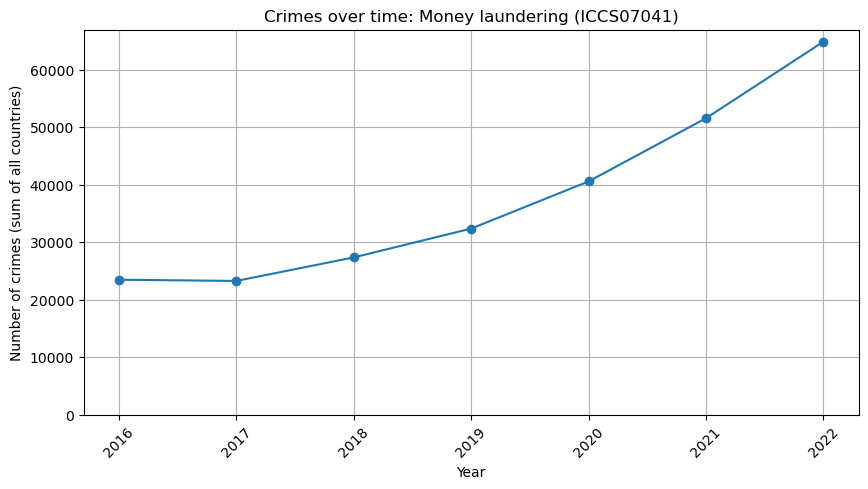

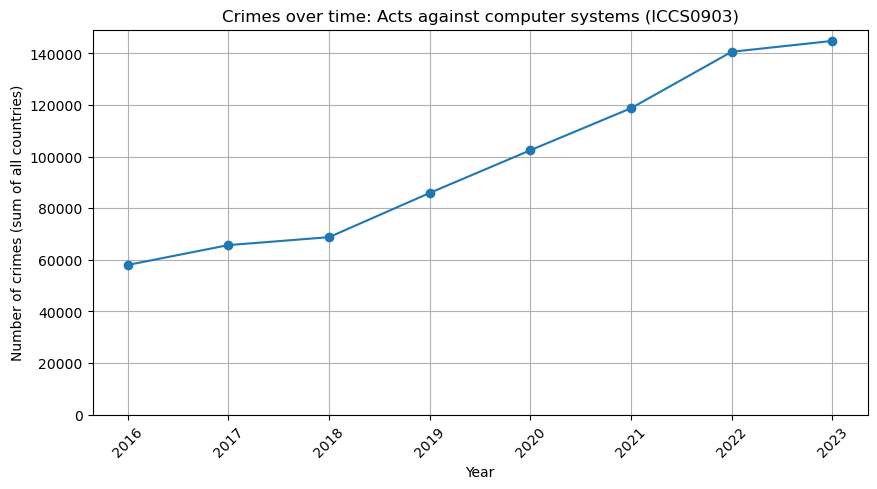

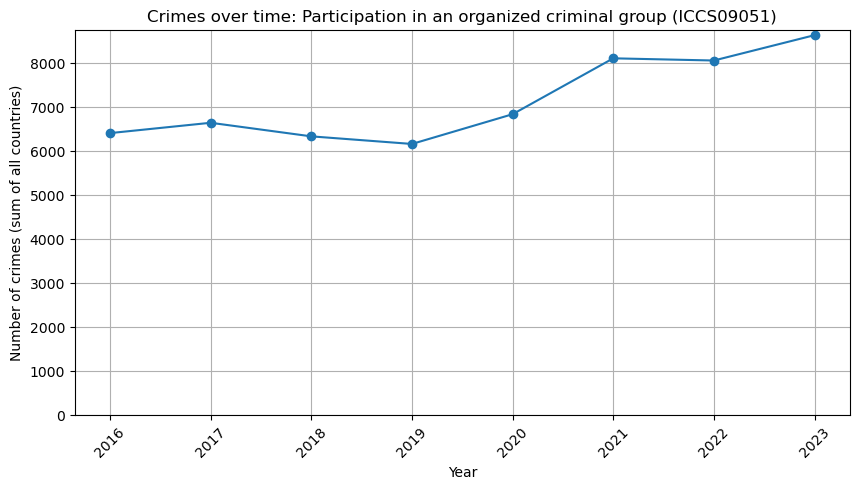

In [6]:
# vaatleme ICCS0302, ICCS07, ICCS09 kuritegusid alates 2016 aastast
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

codes = ['ICCS0302', 'ICCS030221','ICCS0701', 'ICCS0703', 'ICCS07031', 'ICCS07041', 'ICCS0903','ICCS09051']

for code in codes:
    year_cols = ['2016', '2017', '2018', '2019','2020', '2021', '2022', '2023']
    dfcode = df[(df.iccs == code) & (df.unit == 'NR')]
    if(code=='ICCS0701' or code=='ICCS07041'):
        year_cols = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

    #eemaldan read, kus enam kui pool vaadeldavatest lahtritest on tühjad
    dfcode = dfcode.dropna(thresh=len(year_cols)//2, subset=year_cols)
    yearsum = dfcode[year_cols].sum()

    # get crime name from mapping, fallback to code if not found
    crime_name = iccs_mapping.get(code, code)

    plt.figure(figsize=(10, 5))
    plt.plot(year_cols, yearsum, marker="o")
    plt.title(f"Crimes over time: {crime_name} ({code})")
    plt.xlabel("Year")
    plt.ylabel("Number of crimes (sum of all countries)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.ylim(bottom=0)

    # Force plain numbers
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # disable offset
    ax.ticklabel_format(style='plain', axis='y')
    plt.show()

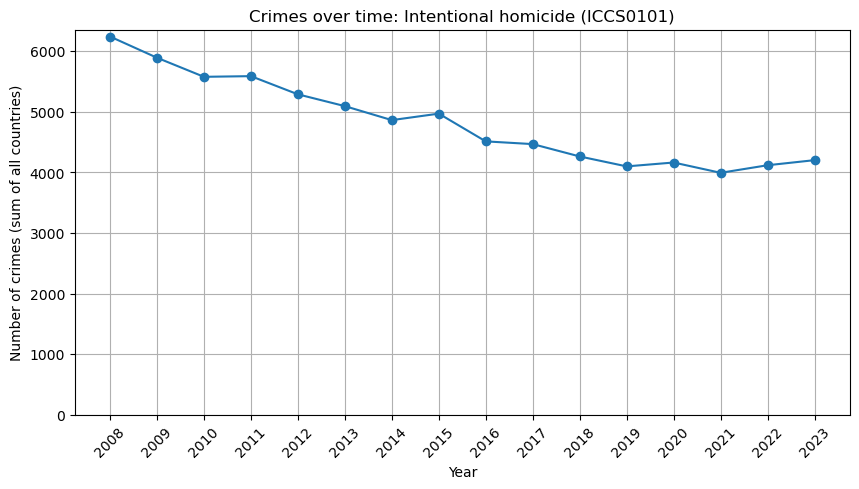

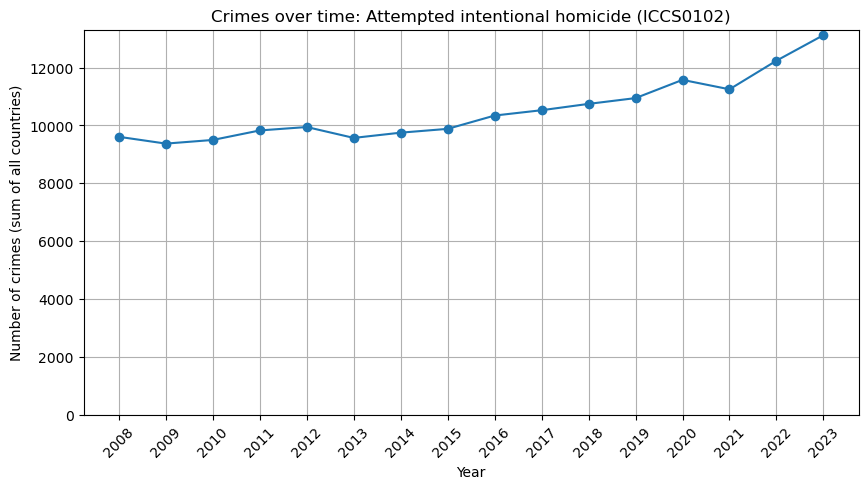

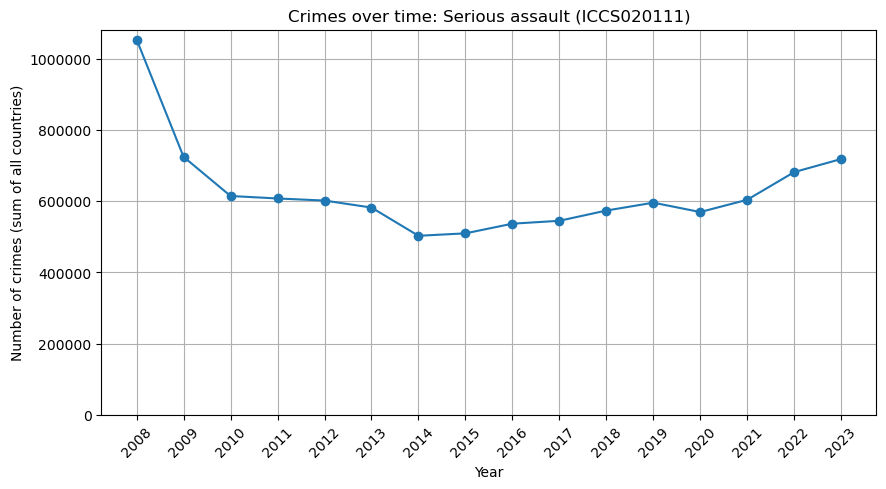

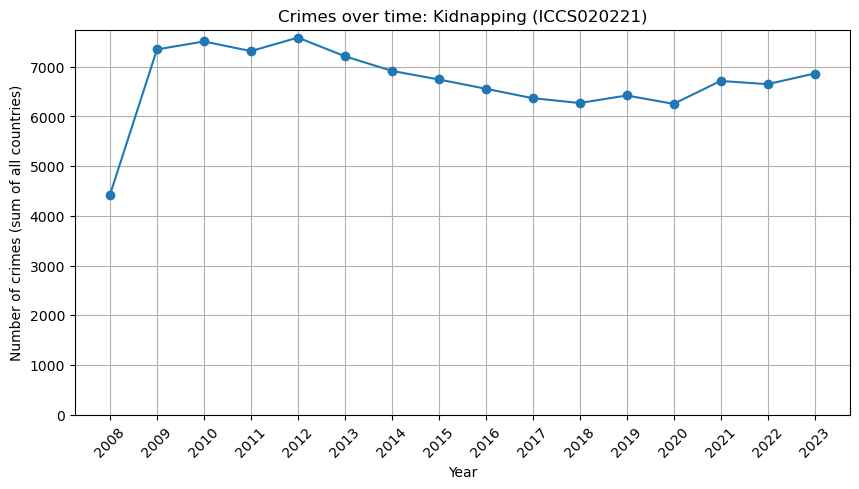

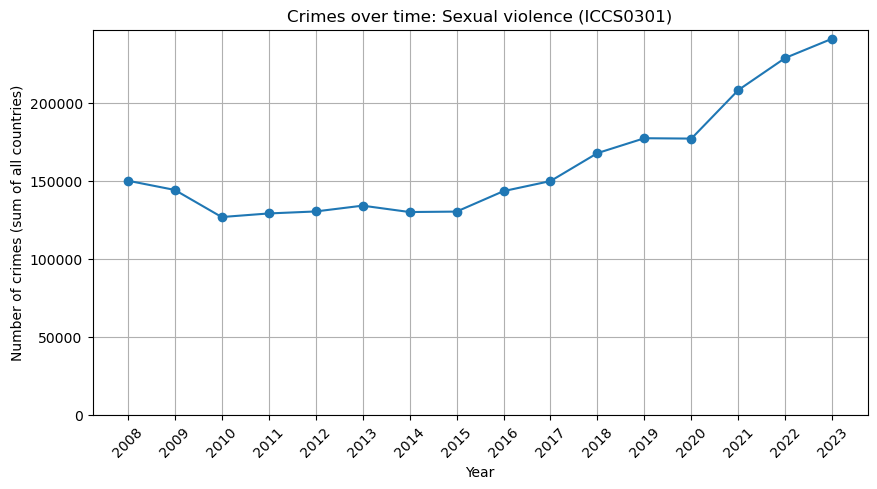

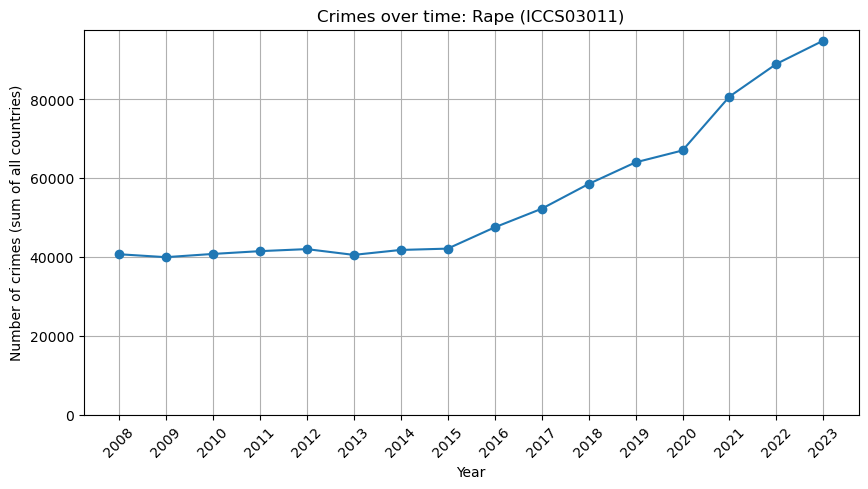

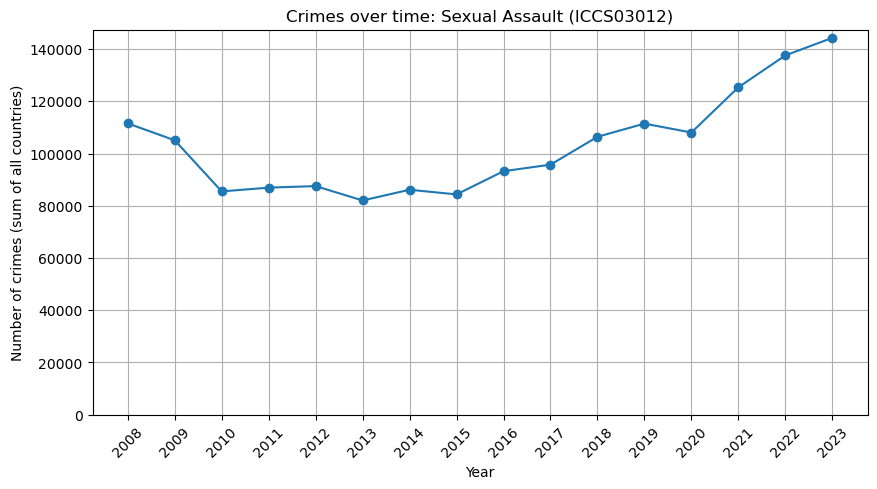

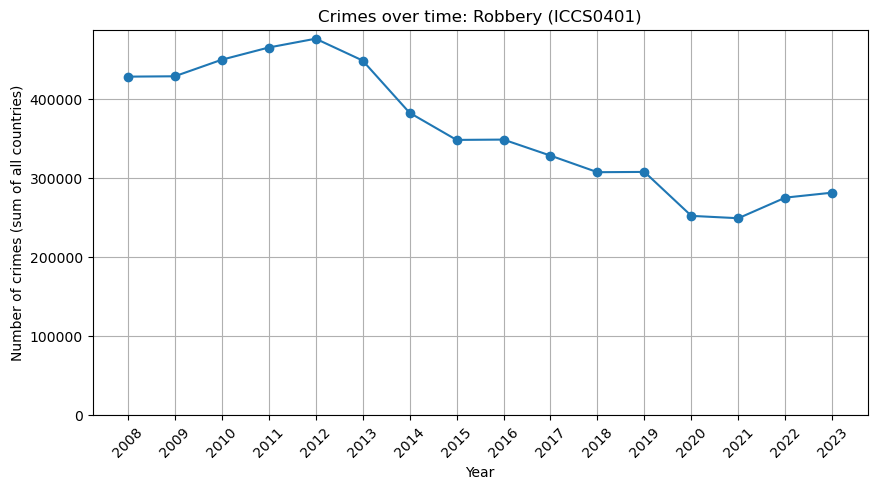

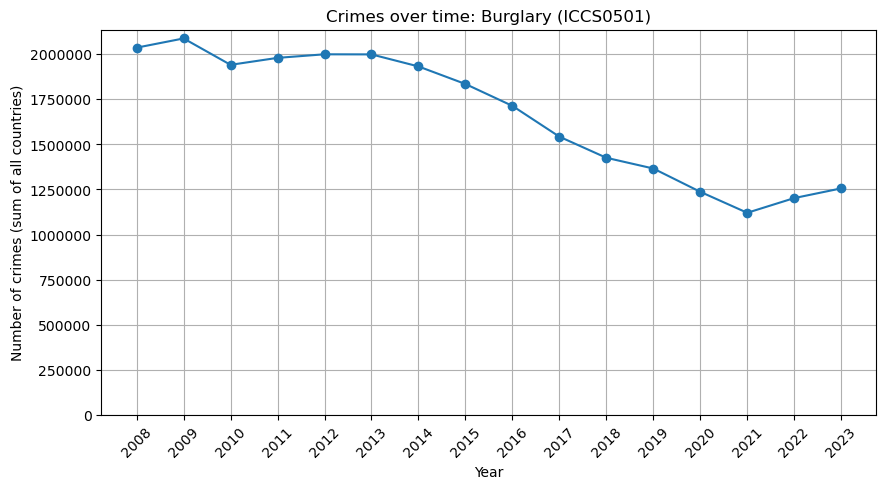

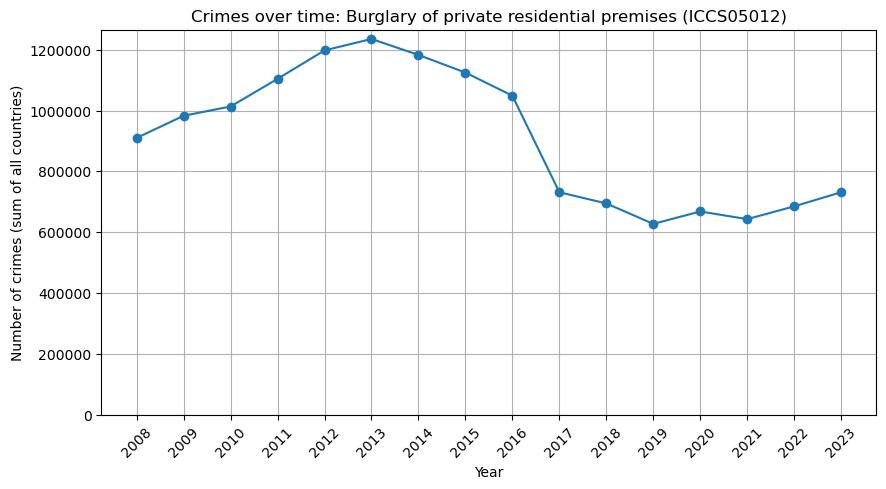

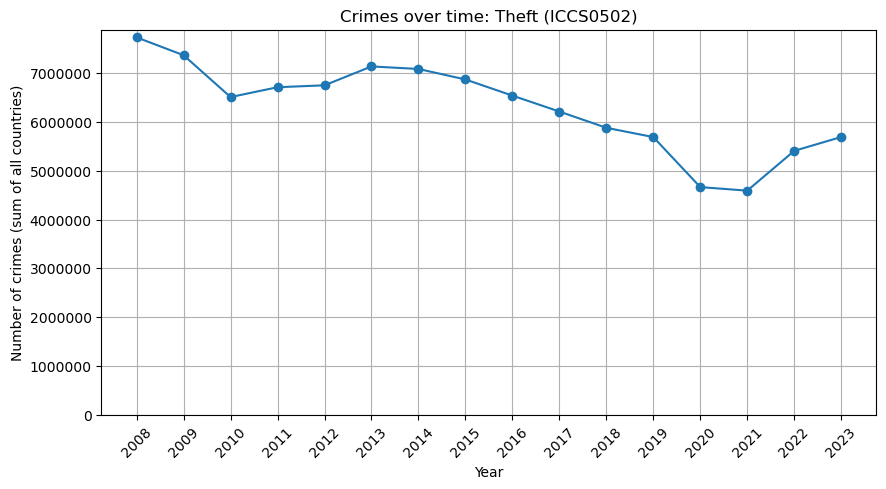

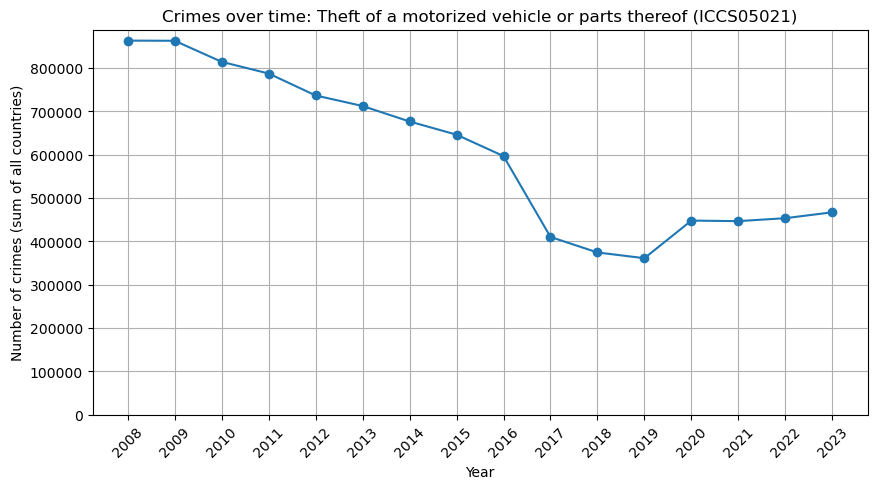

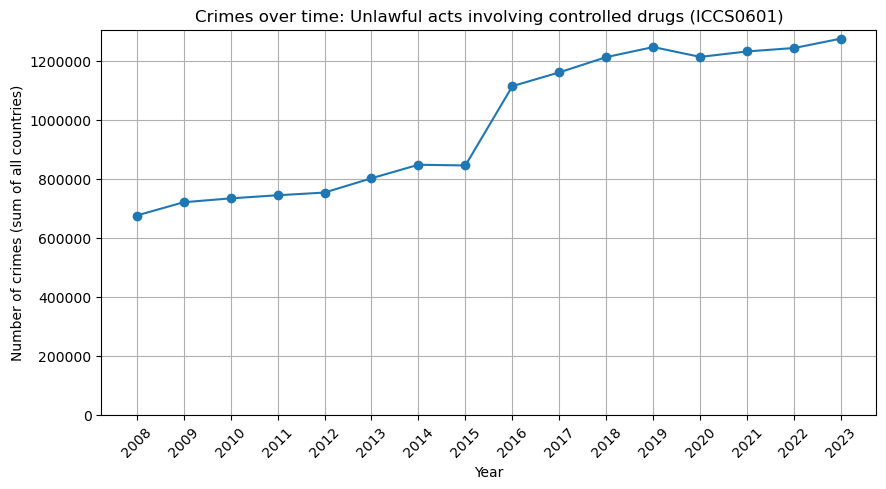

In [7]:
# vaatleme ülejäänud kuritegusid alates 2008 aastast
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

year_cols = ['2008', '2009', '2010', '2011','2012', '2013', '2014', '2015','2016', '2017', '2018', '2019','2020', '2021', '2022', '2023']
codes = ['ICCS0101', 'ICCS0102', 'ICCS020111', 'ICCS020221', 'ICCS0301', 'ICCS03011', 'ICCS03012', 'ICCS0401', 'ICCS0501', 'ICCS05012', 'ICCS0502', 'ICCS05021', 'ICCS0601']

for code in codes:
    dfcode = df[(df.iccs == code) & (df.unit == 'NR')]

    #eemaldan read, kus paljud vaadeldavatest lahtritest on tühjad
    dfcode = dfcode.dropna(thresh=12, subset=year_cols)
    yearsum = dfcode[year_cols].sum()

    # get crime name from mapping, fallback to code if not found
    crime_name = iccs_mapping.get(code, code)

    plt.figure(figsize=(10, 5))
    plt.plot(year_cols, yearsum, marker="o")
    plt.title(f"Crimes over time: {crime_name} ({code})")
    plt.xlabel("Year")
    plt.ylabel("Number of crimes (sum of all countries)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.ylim(bottom=0)

    # Force plain numbers
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # disable offset
    ax.ticklabel_format(style='plain', axis='y')
    plt.show()

Sama asi kasutades per hundred thousand inhabitants


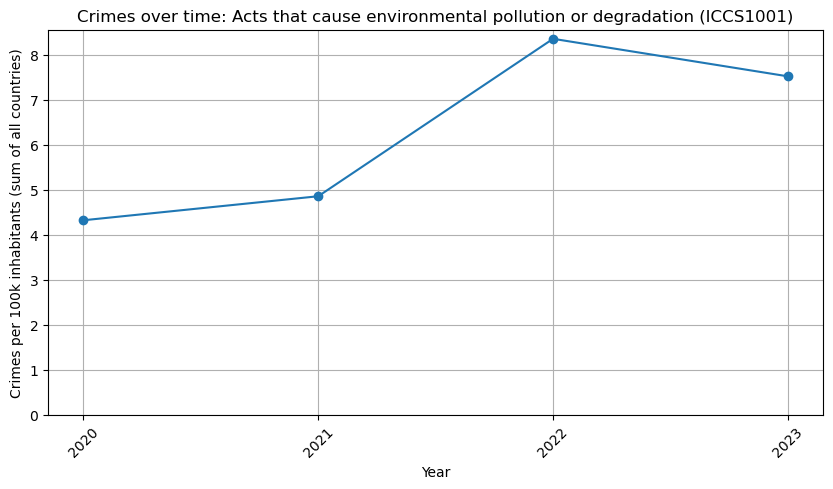

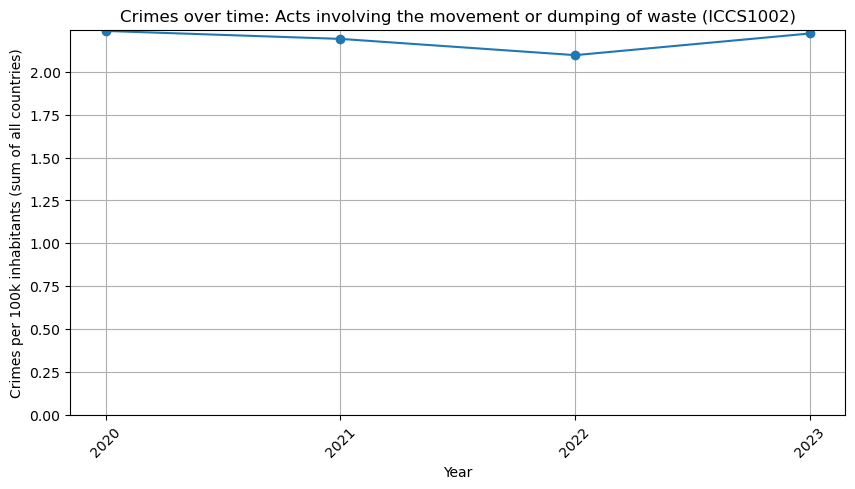

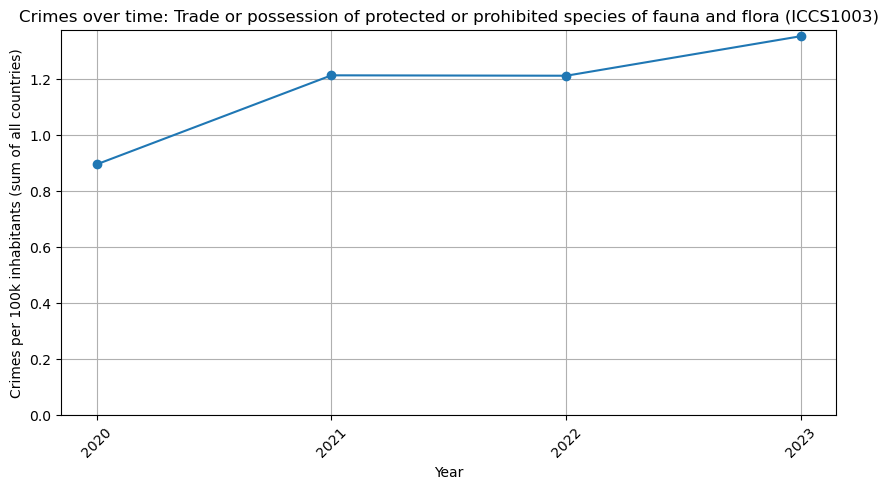

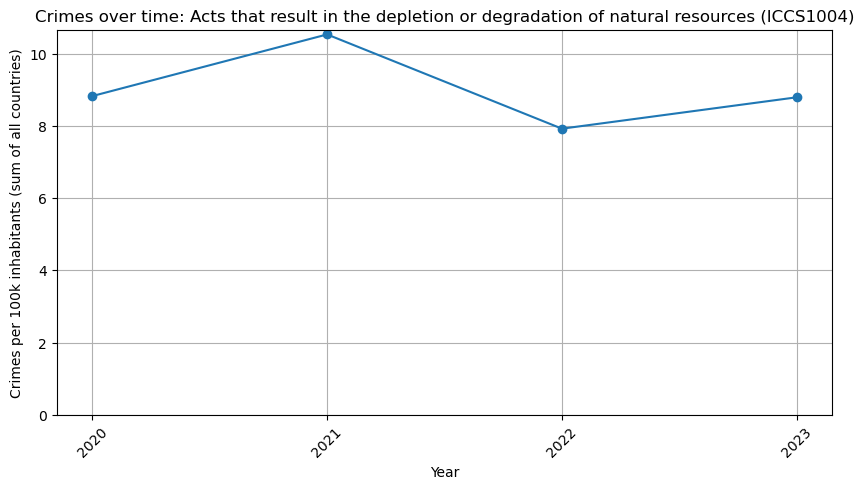

In [8]:
# vaatleme ICCS10 kuritegusid alates 2020 aastast
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

year_cols = ['2020', '2021', '2022', '2023']
codes = ['ICCS1001', 'ICCS1002', 'ICCS1003', 'ICCS1004']

for code in codes:
    dfcode = df[(df.iccs == code) & (df.unit == 'P_HTHAB')]
    yearavg = dfcode[year_cols].mean(skipna=True)

    # get crime name from mapping, fallback to code if not found
    crime_name = iccs_mapping.get(code, code)

    plt.figure(figsize=(10, 5))
    plt.plot(year_cols, yearavg, marker="o")
    plt.title(f"Crimes over time: {crime_name} ({code})")
    plt.xlabel("Year")
    plt.ylabel("Crimes per 100k inhabitants (sum of all countries)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.ylim(bottom=0)

    # Force plain numbers
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # disable offset
    ax.ticklabel_format(style='plain', axis='y')
    plt.show()

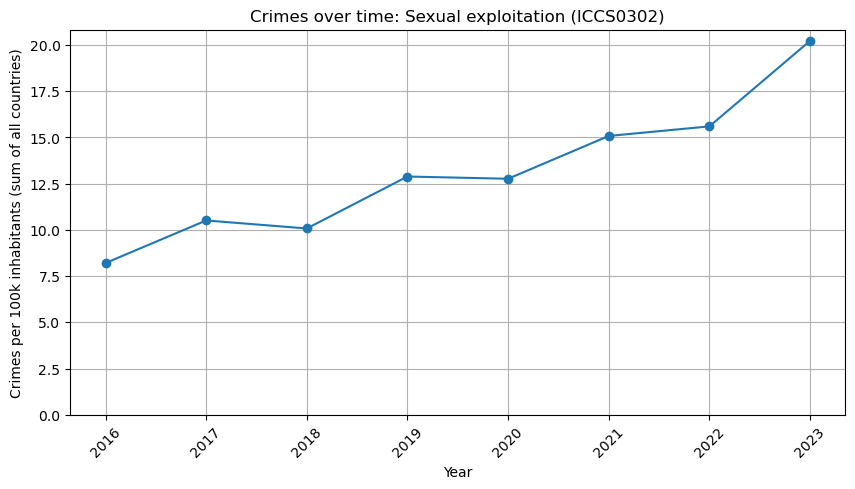

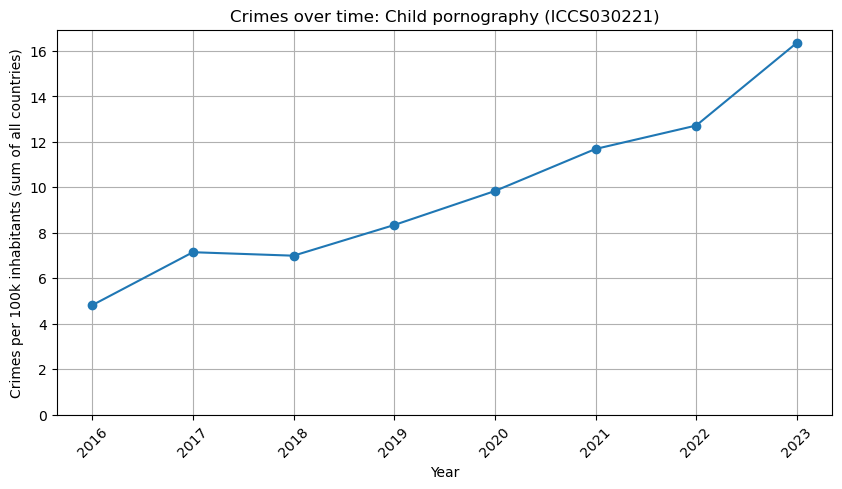

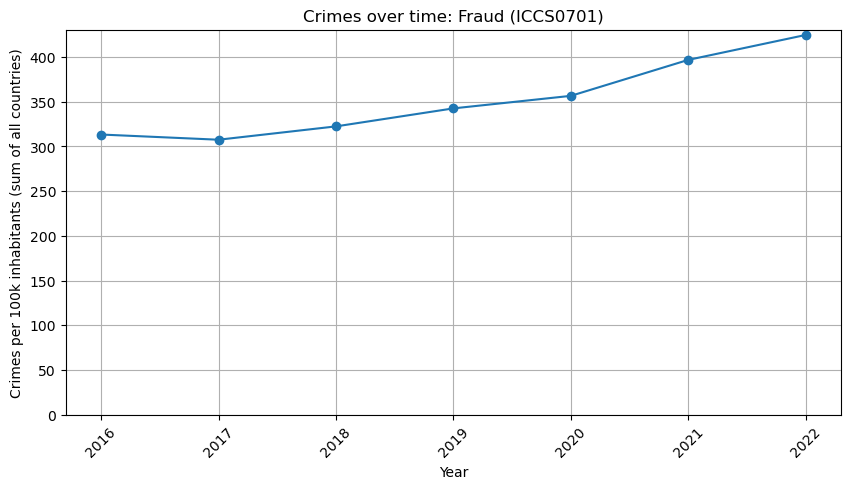

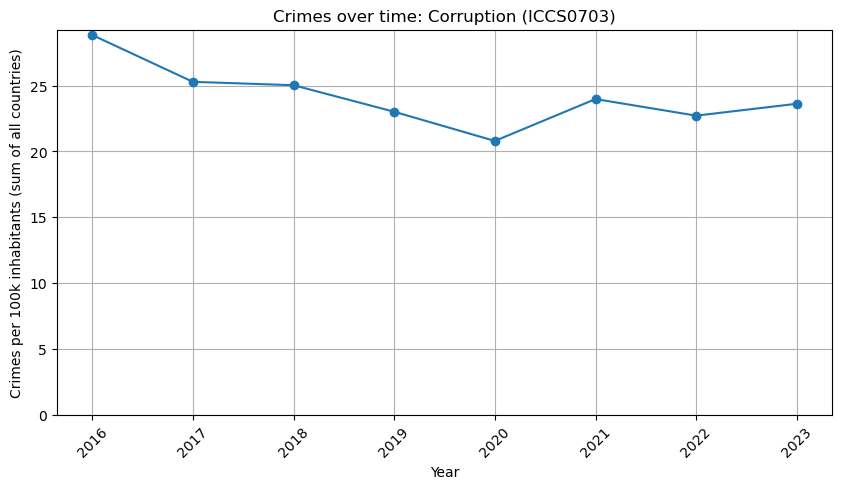

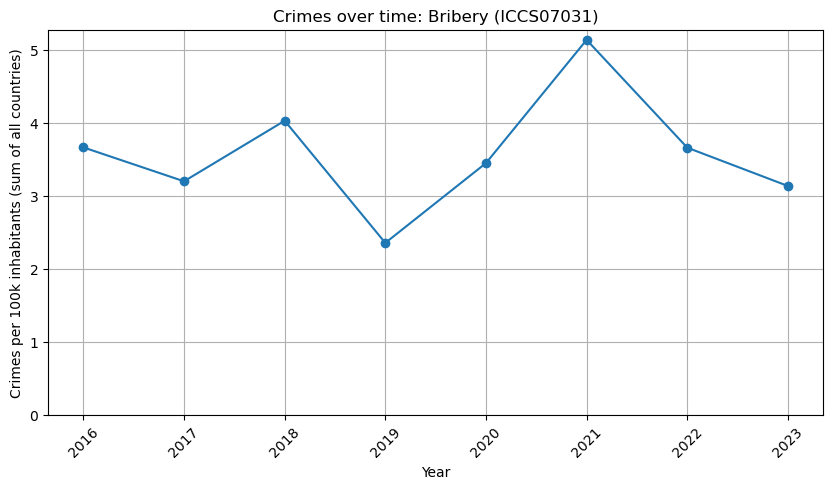

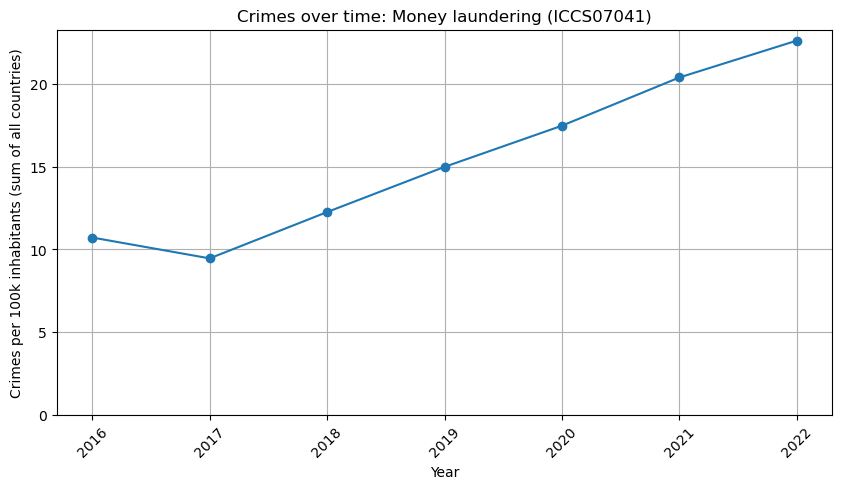

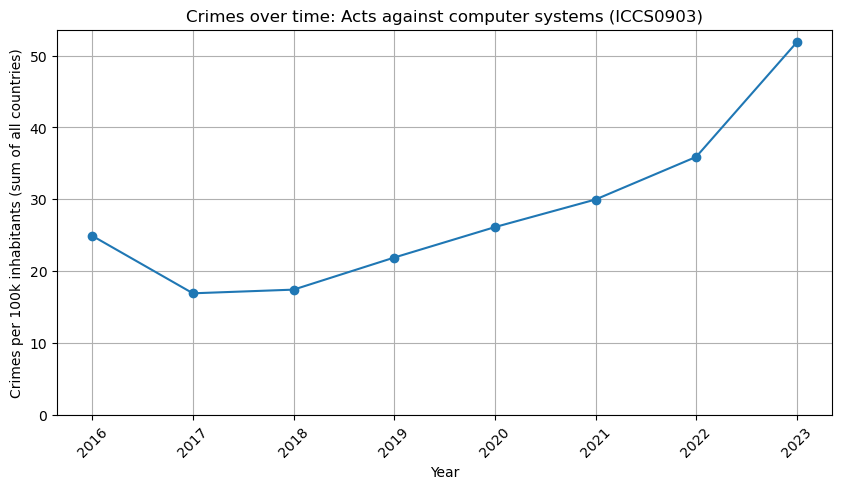

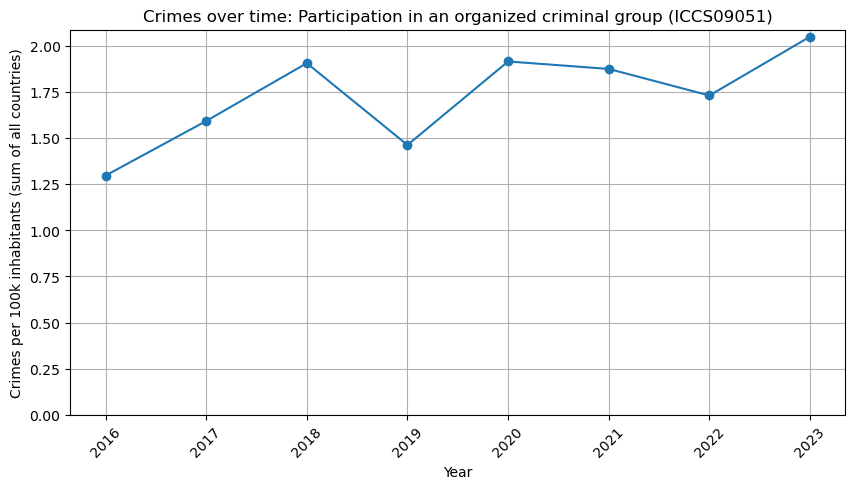

In [9]:
# vaatleme ICCS0302, ICCS07, ICCS09 kuritegusid alates 2016 aastast
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

codes = ['ICCS0302', 'ICCS030221', 'ICCS0701', 'ICCS0703', 'ICCS07031', 'ICCS07041', 'ICCS0903', 'ICCS09051']

for code in codes:
    year_cols = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
    dfcode = df[(df.iccs == code) & (df.unit == 'P_HTHAB')]

    if(code=='ICCS0701' or code=='ICCS07041'):
        year_cols = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

    #eemaldan read, kus enam kui pool vaadeldavatest lahtritest on tühjad
    dfcode = dfcode.dropna(thresh=len(year_cols) // 2, subset=year_cols)
    yearavg = dfcode[year_cols].mean(skipna=True)

    # get crime name from mapping, fallback to code if not found
    crime_name = iccs_mapping.get(code, code)

    plt.figure(figsize=(10, 5))
    plt.plot(year_cols, yearavg, marker="o")
    plt.title(f"Crimes over time: {crime_name} ({code})")
    plt.xlabel("Year")
    plt.ylabel("Crimes per 100k inhabitants (sum of all countries)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.ylim(bottom=0)

    # Force plain numbers
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # disable offset
    ax.ticklabel_format(style='plain', axis='y')
    plt.show()

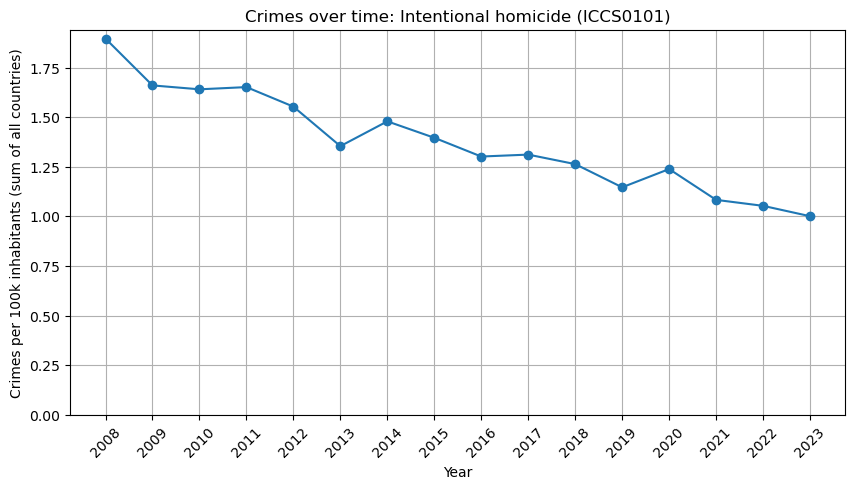

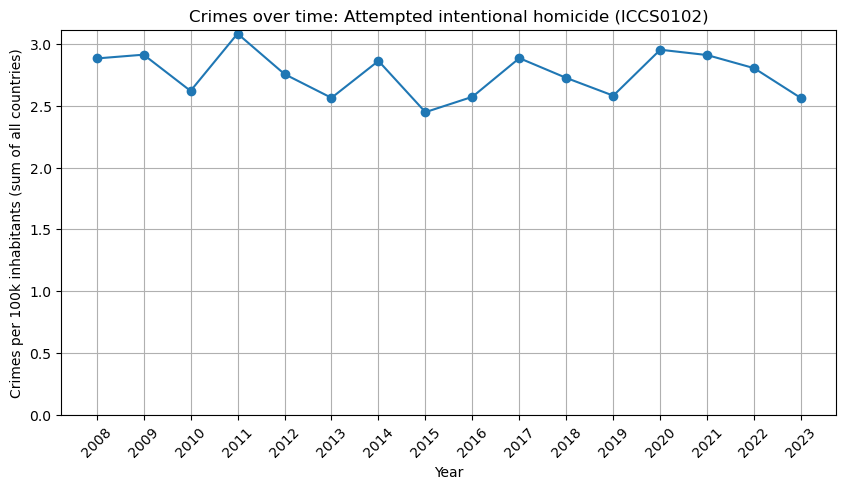

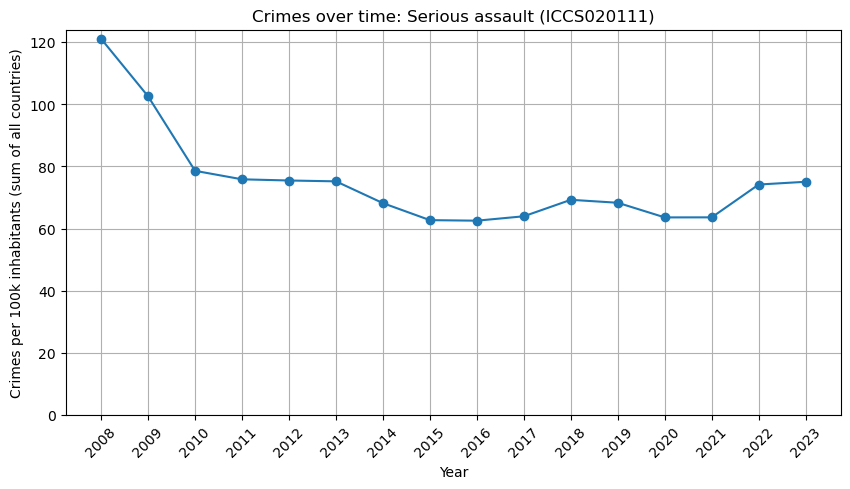

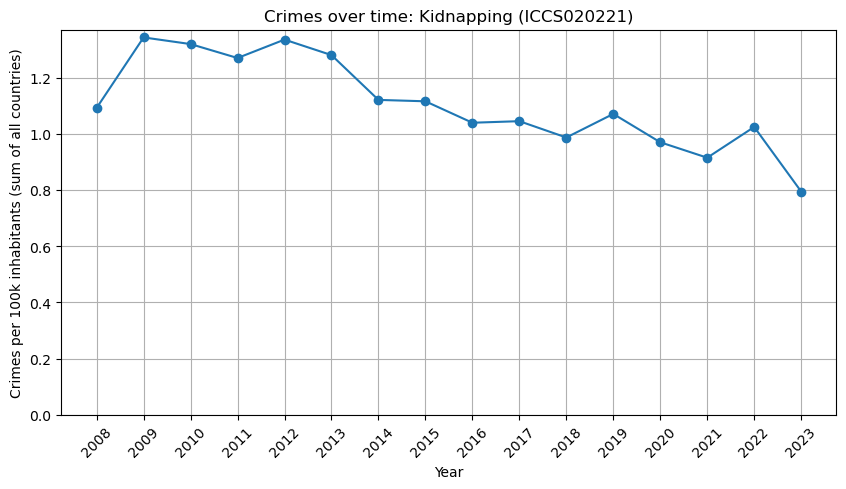

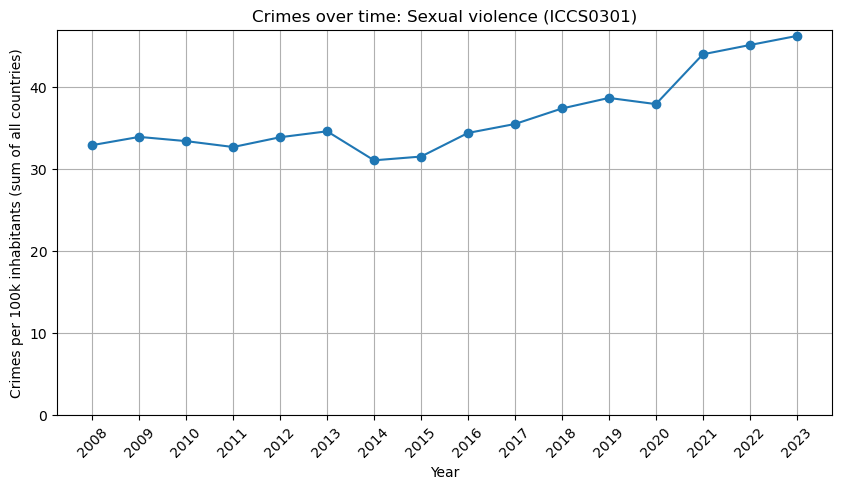

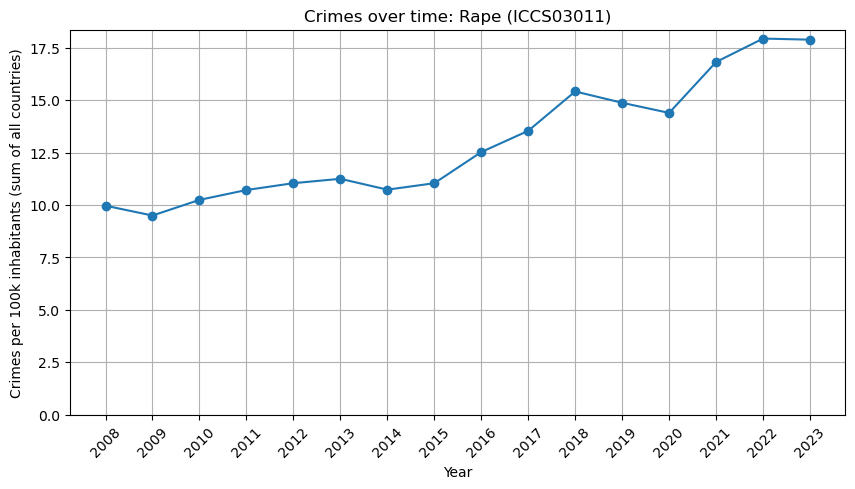

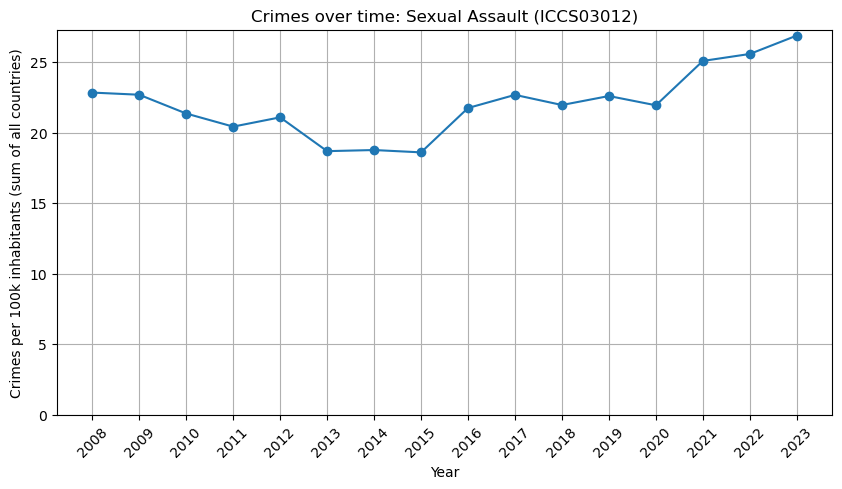

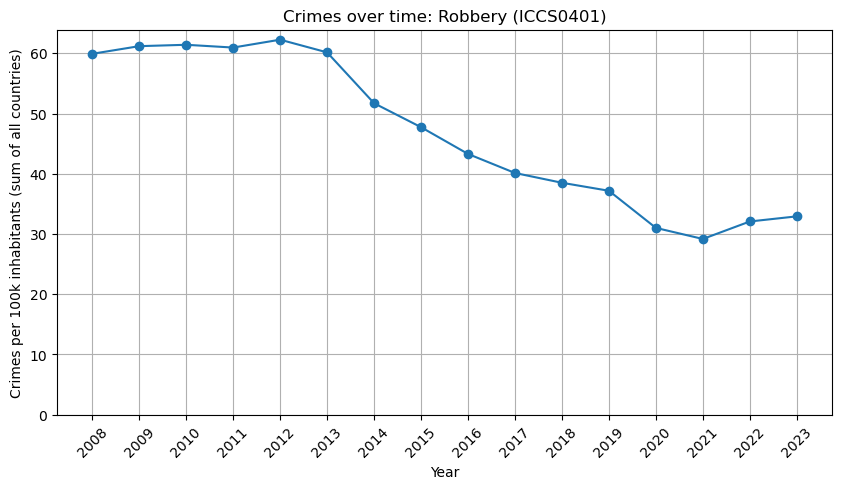

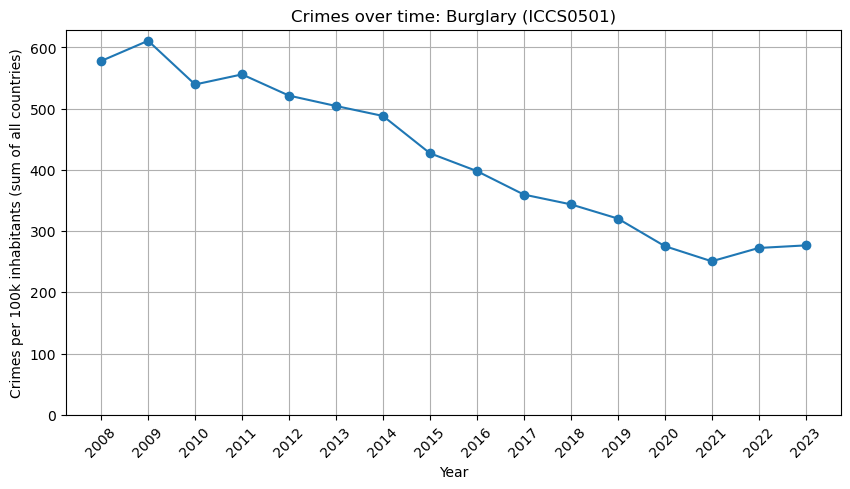

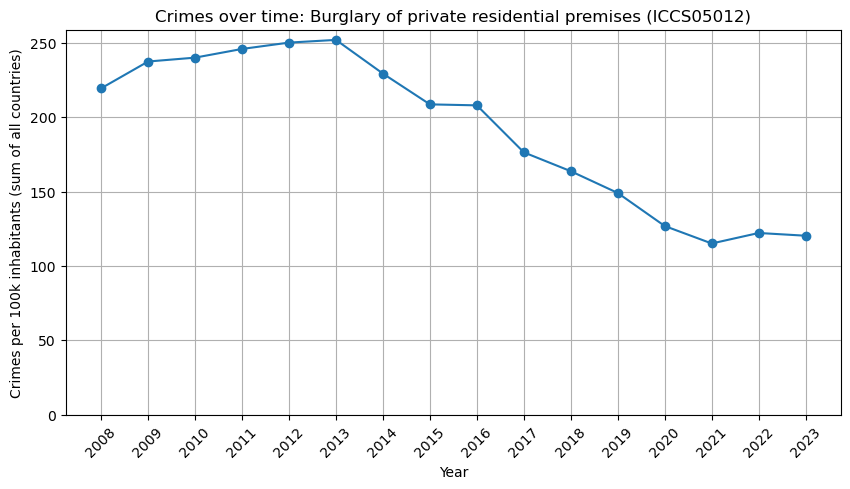

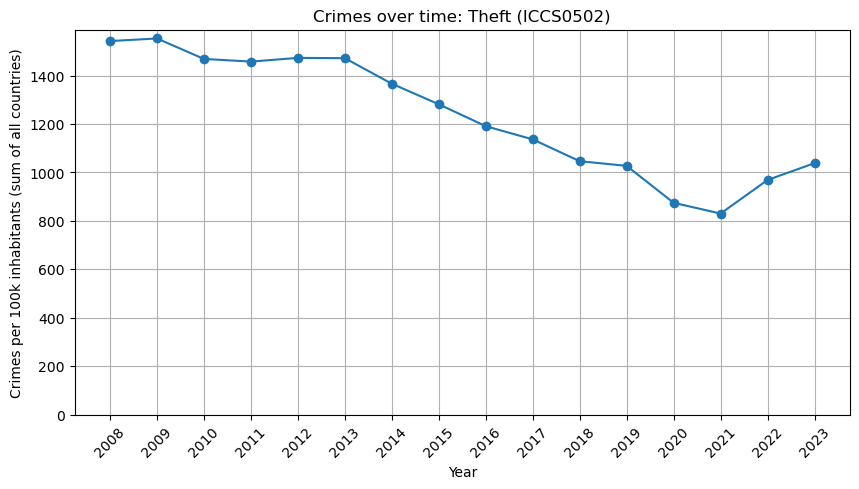

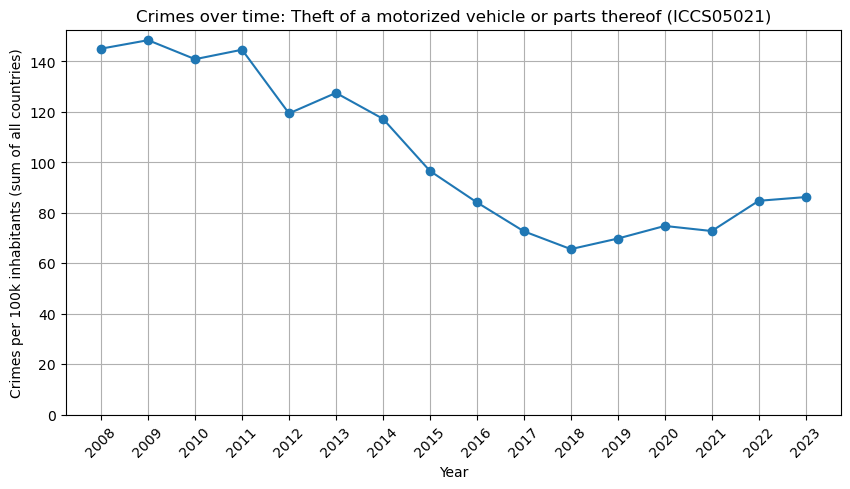

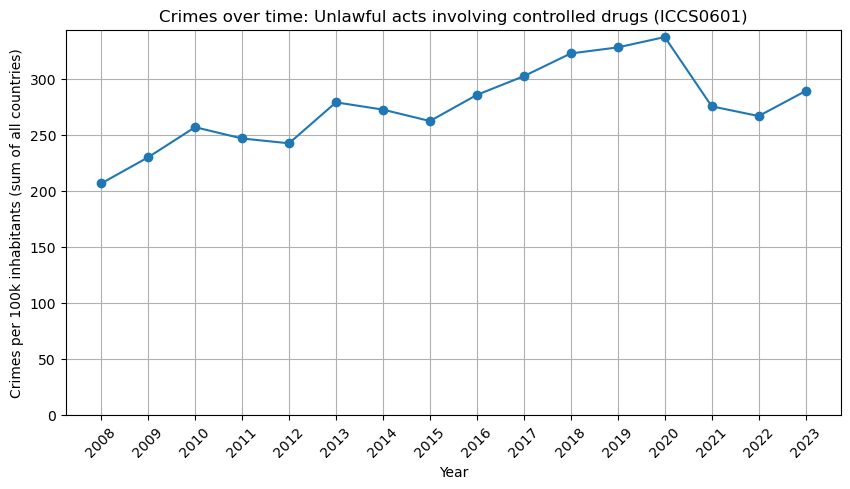

In [10]:
# vaatleme ülejäänud kuritegusid alates 2008 aastast
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

year_cols = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
codes = ['ICCS0101', 'ICCS0102', 'ICCS020111', 'ICCS020221', 'ICCS0301', 'ICCS03011','ICCS03012', 'ICCS0401', 'ICCS0501', 'ICCS05012', 'ICCS0502', 'ICCS05021', 'ICCS0601']

for code in codes:
    dfcode = df[(df.iccs == code) & (df.unit == 'P_HTHAB')]

    #eemaldan read, kus paljud lahtrid on tühjad
    dfcode = dfcode.dropna(thresh=12, subset=year_cols)
    yearavg = dfcode[year_cols].mean(skipna=True)

    # get crime name from mapping, fallback to code if not found
    crime_name = iccs_mapping.get(code, code)

    plt.figure(figsize=(10, 5))
    plt.plot(year_cols, yearavg, marker="o")
    plt.title(f"Crimes over time: {crime_name} ({code})")
    plt.xlabel("Year")
    plt.ylabel("Crimes per 100k inhabitants (sum of all countries)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.ylim(bottom=0)

    # Force plain numbers
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # disable offset
    ax.ticklabel_format(style='plain', axis='y')
    plt.show()

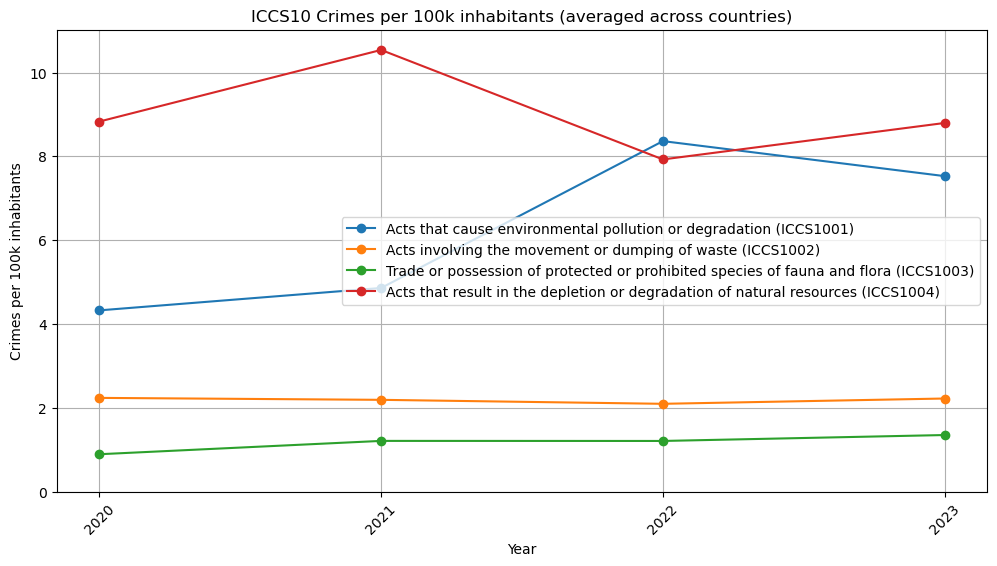

In [11]:
# Plot ICCS10 crime rates per 100k inhabitants from 2020 onward
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

year_cols = ['2020', '2021', '2022', '2023']
codes = ['ICCS1001', 'ICCS1002', 'ICCS1003', 'ICCS1004']

plt.figure(figsize=(12, 6))

for code in codes:
    # Filter for crime + per-100k inhabitants
    dfcode = df[(df.iccs == code) & (df.unit == 'P_HTHAB')]

    # Average over all countries for each year
    yearavg = dfcode[year_cols].mean(skipna=True)

    # Crime name for legend
    crime_name = iccs_mapping.get(code, code)

    # Add one line to the combined plot
    plt.plot(year_cols, yearavg, marker="o", label=f"{crime_name} ({code})")

# Formatting
plt.title("ICCS10 Crimes per 100k inhabitants (averaged across countries)")
plt.xlabel("Year")
plt.ylabel("Crimes per 100k inhabitants")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)

# Plain numbers on Y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Legend for multiple lines
plt.legend()

plt.show()

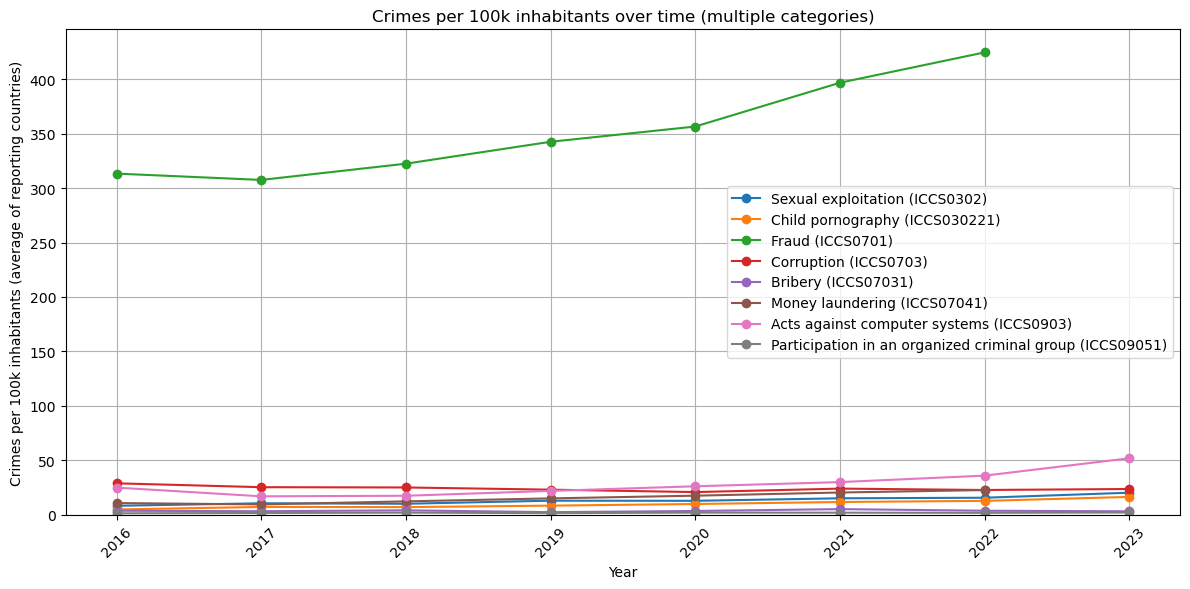

In [12]:
# Plot multiple ICCS codes on one graph (P_HTHAB)
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

codes = ['ICCS0302', 'ICCS030221', 'ICCS0701','ICCS0703',
         'ICCS07031', 'ICCS07041', 'ICCS0903', 'ICCS09051']

# Base years
default_years = ['2016','2017','2018','2019','2020','2021','2022','2023']

plt.figure(figsize=(12, 6))

for code in codes:

    # Adjust year columns if needed
    if code in ['ICCS0701', 'ICCS07041']:
        year_cols = ['2016','2017','2018','2019','2020','2021','2022']
    else:
        year_cols = default_years

    dfcode = df[(df.iccs == code) & (df.unit == 'P_HTHAB')]

    # Drop rows with more than half missing
    dfcode = dfcode.dropna(thresh=len(year_cols)//2, subset=year_cols)

    # Average per year (ignoring missing)
    yearavg = dfcode[year_cols].mean(skipna=True)

    # Crime name mapping
    crime_name = iccs_mapping.get(code, code)

    # Add line to shared plot
    plt.plot(year_cols, yearavg, marker="o", label=f"{crime_name} ({code})")

# ---- Formatting ----
plt.title("Crimes per 100k inhabitants over time (multiple categories)")
plt.xlabel("Year")
plt.ylabel("Crimes per 100k inhabitants (average of reporting countries)")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)

# Plain numbers on y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.tight_layout()
plt.show()


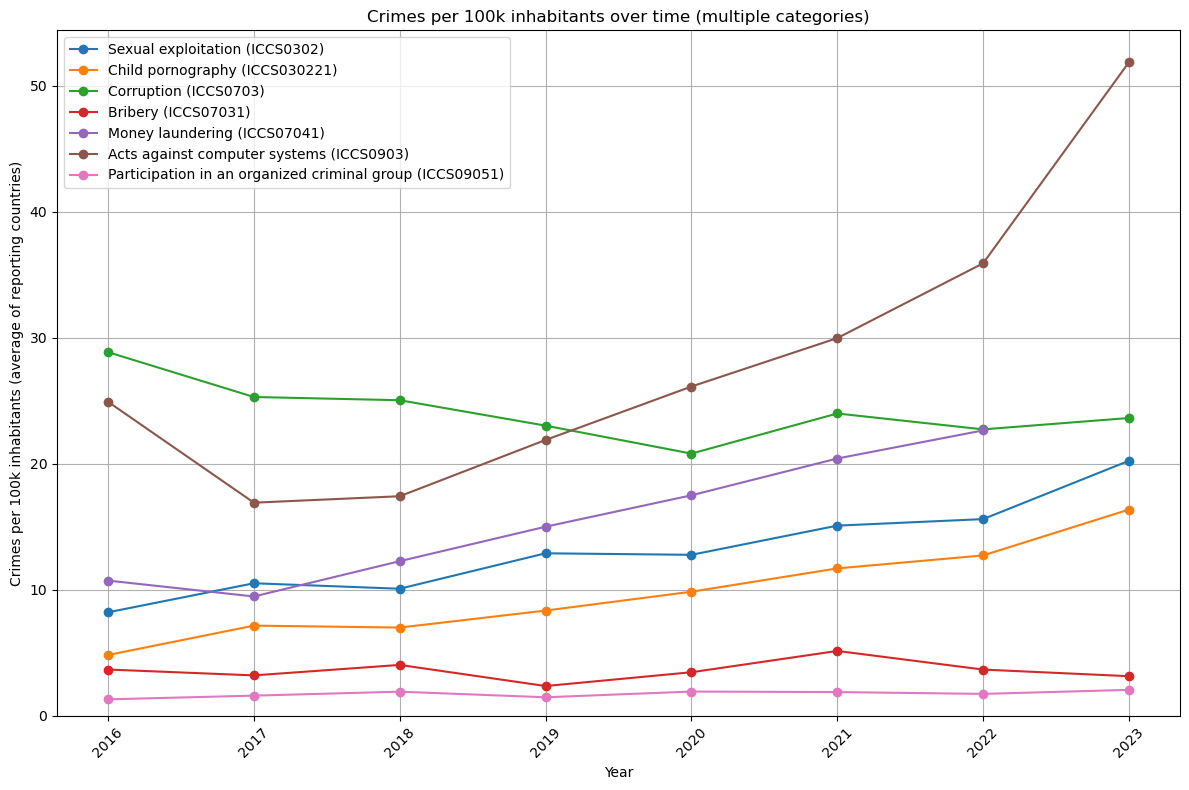

In [13]:
#same without fraud
# Plot multiple ICCS codes on one graph (P_HTHAB)
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

codes = ['ICCS0302', 'ICCS030221','ICCS0703',
         'ICCS07031', 'ICCS07041', 'ICCS0903', 'ICCS09051']

# Base years
default_years = ['2016','2017','2018','2019','2020','2021','2022','2023']

plt.figure(figsize=(12, 8))

for code in codes:

    # Adjust year columns if needed
    if code in ['ICCS0701', 'ICCS07041']:
        year_cols = ['2016','2017','2018','2019','2020','2021','2022']
    else:
        year_cols = default_years

    dfcode = df[(df.iccs == code) & (df.unit == 'P_HTHAB')]

    # Drop rows with more than half missing
    dfcode = dfcode.dropna(thresh=len(year_cols)//2, subset=year_cols)

    # Average per year (ignoring missing)
    yearavg = dfcode[year_cols].mean(skipna=True)

    # Crime name mapping
    crime_name = iccs_mapping.get(code, code)

    # Add line to shared plot
    plt.plot(year_cols, yearavg, marker="o", label=f"{crime_name} ({code})")

# ---- Formatting ----
plt.title("Crimes per 100k inhabitants over time (multiple categories)")
plt.xlabel("Year")
plt.ylabel("Crimes per 100k inhabitants (average of reporting countries)")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)

# Plain numbers on y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.tight_layout()
plt.show()

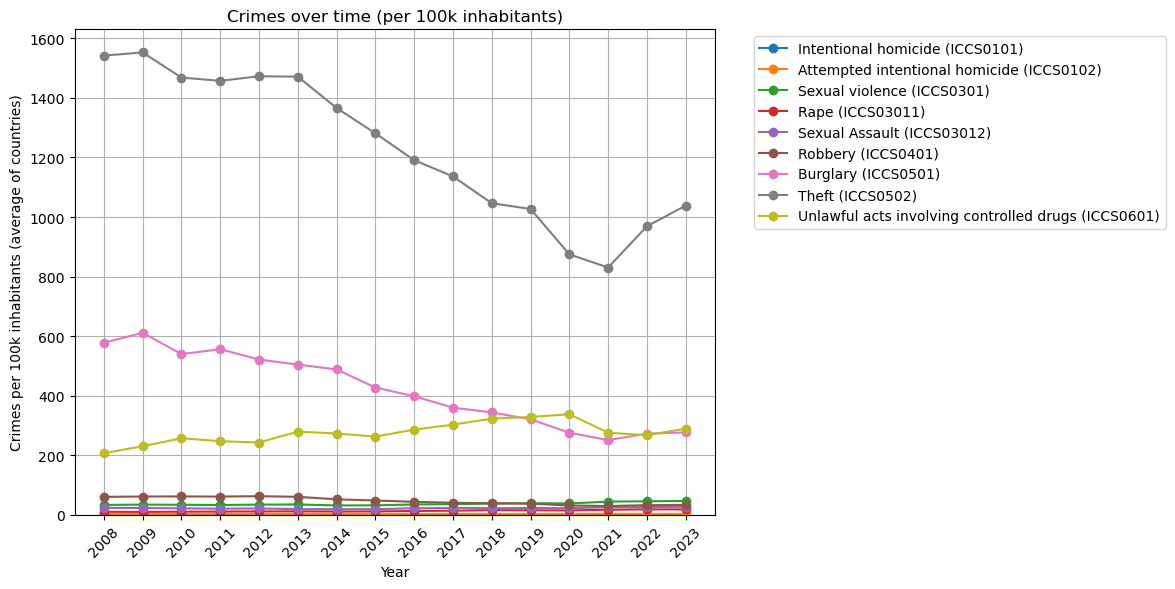

In [14]:
# vaatleme ülejäänud kuritegusid alates 2008 aastast
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

year_cols = [
    '2008','2009','2010','2011','2012','2013','2014','2015',
    '2016','2017','2018','2019','2020','2021','2022','2023'
]

codes = [
    'ICCS0101', 'ICCS0102', 'ICCS0301', 'ICCS03011',
    'ICCS03012', 'ICCS0401', 'ICCS0501', 'ICCS0502', 'ICCS0601'
]

plt.figure(figsize=(12, 6))     # all lines on ONE figure

for code in codes:
    dfcode = df[(df.iccs == code) & (df.unit == 'P_HTHAB')]

    # eemaldan read, kus liiga palju tühje
    dfcode = dfcode.dropna(thresh=12, subset=year_cols)

    # average per year (ignore NaNs)
    yearavg = dfcode[year_cols].mean(skipna=True)

    # crime readable name
    crime_name = iccs_mapping.get(code, code)

    # plot on the SAME axes
    plt.plot(year_cols, yearavg, marker="o", label=f"{crime_name} ({code})")

# formatting
plt.title("Crimes over time (per 100k inhabitants)")
plt.xlabel("Year")
plt.ylabel("Crimes per 100k inhabitants (average of countries)")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)

# plain numbers
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # legend outside
plt.tight_layout()
plt.show()


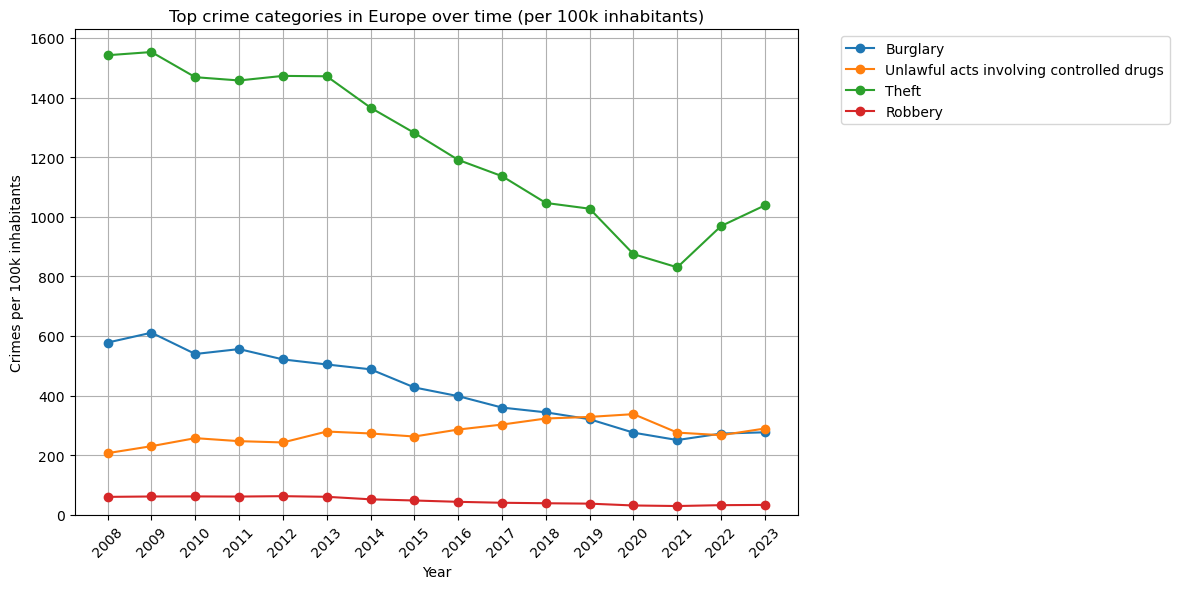

In [15]:
#populaarsemad kuriteod alates 2008
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

year_cols = [
    '2008','2009','2010','2011','2012','2013','2014','2015',
    '2016','2017','2018','2019','2020','2021','2022','2023'
]

codes = ['ICCS0501', 'ICCS0601', 'ICCS0502', 'ICCS0401'
]

plt.figure(figsize=(12, 6))     # all lines on ONE figur

for code in codes:
    dfcode = df[(df.iccs == code) & (df.unit == 'P_HTHAB')]

    # eemaldan read, kus liiga palju tühje
    dfcode = dfcode.dropna(thresh=12, subset=year_cols)

    # average per year (ignore NaNs)
    yearavg = dfcode[year_cols].mean(skipna=True)

    # crime readable name
    crime_name = iccs_mapping.get(code, code)

    # plot on the SAME axes
    plt.plot(year_cols, yearavg, marker="o", label=f"{crime_name}")

# formatting
plt.title("Top crime categories in Europe over time (per 100k inhabitants)")
plt.xlabel("Year")
plt.ylabel("Crimes per 100k inhabitants")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)

# plain numbers
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  #legend outside
plt.tight_layout()
plt.show()


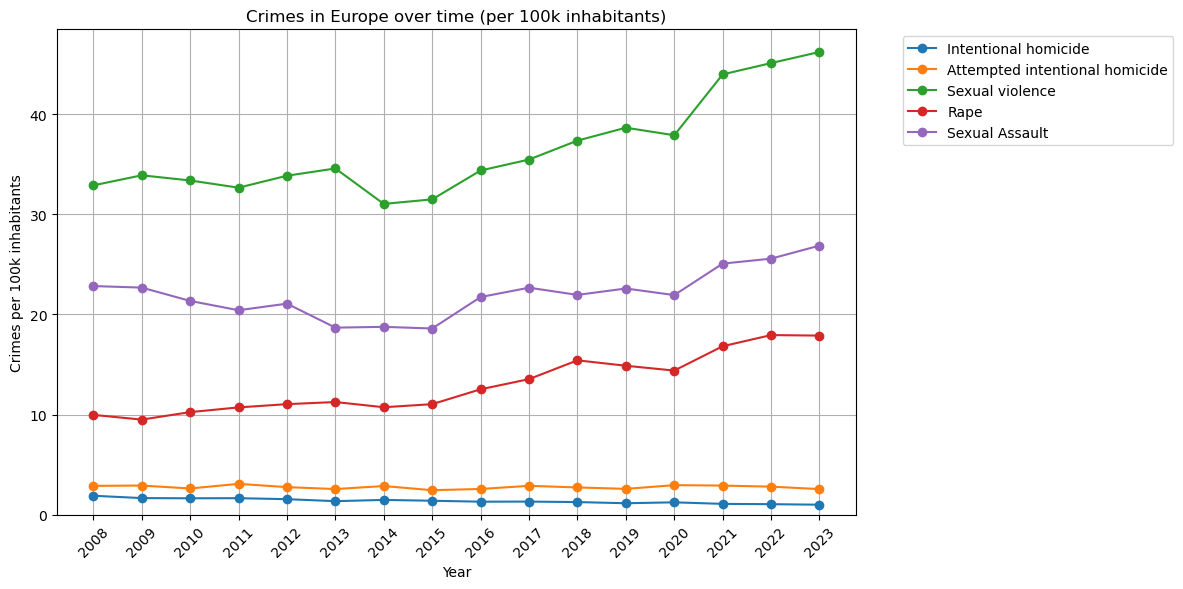

In [16]:
#mitte nii populaarsed kuriteod alates 2008
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

year_cols = [
    '2008','2009','2010','2011','2012','2013','2014','2015',
    '2016','2017','2018','2019','2020','2021','2022','2023'
]

codes = [
    'ICCS0101', 'ICCS0102', 'ICCS0301', 'ICCS03011',
    'ICCS03012'
]

plt.figure(figsize=(12, 6))

for code in codes:
    dfcode = df[(df.iccs == code) & (df.unit == 'P_HTHAB')]

    # eemaldan read, kus liiga palju tühje
    dfcode = dfcode.dropna(thresh=12, subset=year_cols)

    # average per year (ignore NaNs)
    yearavg = dfcode[year_cols].mean(skipna=True)

    # crime readable name
    crime_name = iccs_mapping.get(code, code)

    # plot on the SAME axes
    plt.plot(year_cols, yearavg, marker="o", label=f"{crime_name}")

# formatting
plt.title("Crimes in Europe over time (per 100k inhabitants)")
plt.xlabel("Year")
plt.ylabel("Crimes per 100k inhabitants")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)

# plain numbers
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # legend outside
plt.tight_layout()
plt.show()


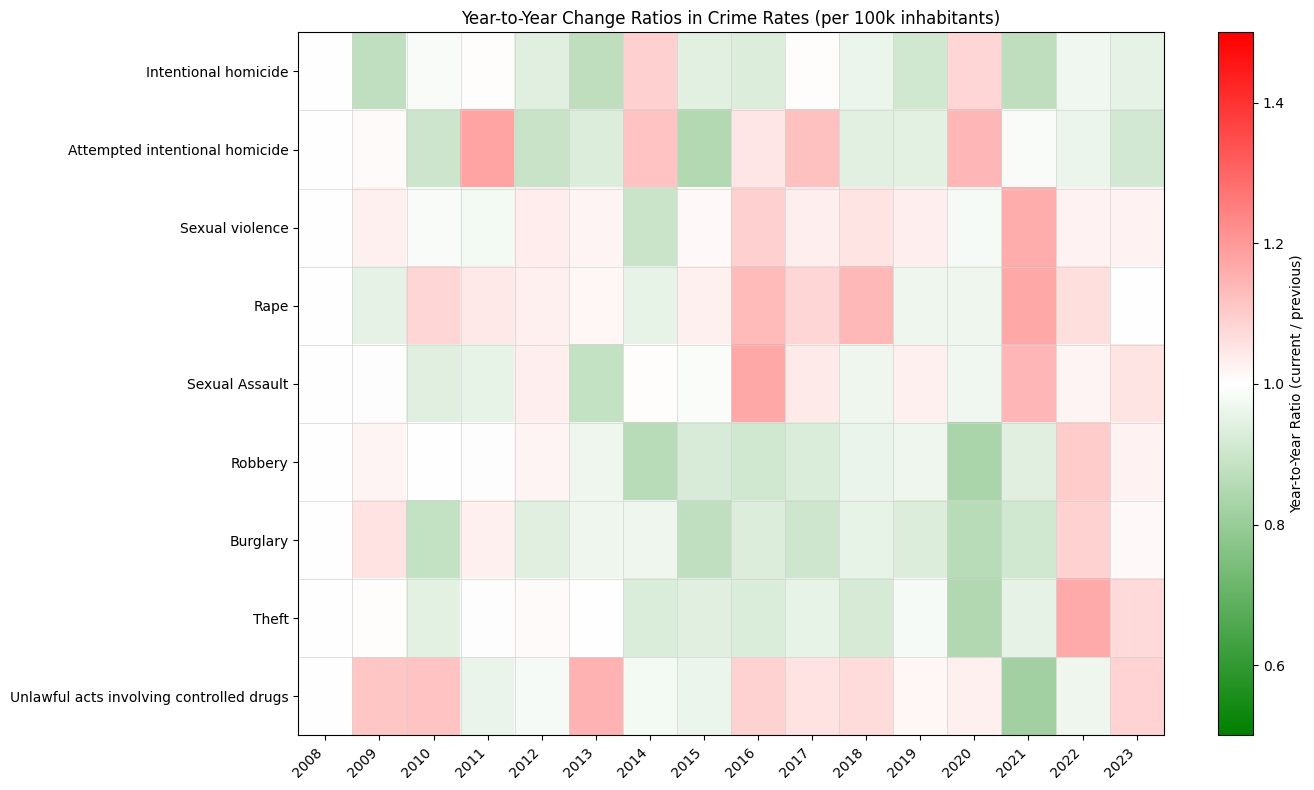

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# -----------------------------
# SETTINGS
# -----------------------------
year_cols = [
    '2008','2009','2010','2011','2012','2013','2014','2015',
    '2016','2017','2018','2019','2020','2021','2022','2023'
]

codes = [
    'ICCS0101', 'ICCS0102', 'ICCS0301', 'ICCS03011',
    'ICCS03012', 'ICCS0401', 'ICCS0501', 'ICCS0502', 'ICCS0601'
]

# -----------------------------
# BUILD THE CHANGE MATRIX
# -----------------------------
change_matrix = []      # rows = crimes, cols = year-to-year ratios
crime_labels = []       # readable names

for code in codes:
    dfcode = df[(df.iccs == code) & (df.unit == 'P_HTHAB')]

    # remove rows with too many NaNs
    dfcode = dfcode.dropna(thresh=12, subset=year_cols)

    # average values by year
    yearavg = dfcode[year_cols].mean(skipna=True)

    # compute year-to-year ratios
    ratios = yearavg / yearavg.shift(1)
    ratios.iloc[0] = 1  # first year has no previous → ratio = 1

    change_matrix.append(ratios.values)
    crime_labels.append(iccs_mapping.get(code, code))

change_matrix = np.array(change_matrix)

# -----------------------------
# HEATMAP (matplotlib only)
# -----------------------------
fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')
ax.set_facecolor('white')

# custom diverging colormap: red = increase, green = decrease, white = no change
cmap = LinearSegmentedColormap.from_list(
    "red_green",
    ["green", "white", "red"]
)

# draw heatmap
im = ax.imshow(change_matrix, cmap=cmap, aspect="auto", vmin=0.5, vmax=1.5)

# axis labels
ax.set_xticks(np.arange(len(year_cols)))
ax.set_xticklabels(year_cols, rotation=45, ha='right')
ax.set_yticks(np.arange(len(crime_labels)))
ax.set_yticklabels(crime_labels)

# colorbar
cbar = plt.colorbar(im)
cbar.set_label("Year-to-Year Ratio (current / previous)")

# grid lines
ax.set_xticks(np.arange(-0.5, len(year_cols), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(crime_labels), 1), minor=True)
ax.grid(which='minor', color='lightgrey', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)

plt.title("Year-to-Year Change Ratios in Crime Rates (per 100k inhabitants)")
plt.tight_layout()
plt.show()
